# PRO Data Science Live Coding Round Assessment - Siddhartha Sharma (20BAI10044)

In [34]:
#Importing all the requirements
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
#Reading the csv datafiles
path = "books.csv";
df = pd.read_csv(path);
ratings_df = pd.read_csv("ratings.csv");
tags_df = pd.read_csv("book_tags.csv");

## Question 1: How many books do not have an original title [books.csv]?

This code checks for missing values in the original_title column using attribute *isna* which detects missing values and returns a boolean same-sized object indicating if the values are NA and sum which returns the sum of the values

In [36]:
missing_original_title_count = df['original_title'].isna().sum()

print(f"Number of books without an original titles are {missing_original_title_count}")

Number of books without an original titles are 36


## Question 2 : How many unique books are present in the dataset ? Evaluate based on the 'book_id' after removing records containing null values for original_title column in [books.csv] and corresponding records in [book_tags.csv] and [ratings.csv]

In order to find the unique books we first need to remove the books not having an original title and then count the books having unique book_id.

The first step is made possible using *dropna* attribute which return a new Series with missing values removed and we have taken the parameter subset which tells which columns to include.

The second step is done using the parameter *nunique* which counts the number of distinct elements in specified axis.

In [37]:
df_filtered = df.dropna(subset=['original_title'])
unique_books_count = df_filtered['book_id'].nunique()

print(f"Number of unique books after removing null values in 'original_title': {unique_books_count}")

Number of unique books after removing null values in 'original_title': 363


## Question 3 : How many unique users are present in the dataset [ratings.csv] ?

We use the *nunique()* function to count the number of unique values in the *user_id* column, representing the unique users in the dataset.

In [38]:
unique_users = ratings_df['user_id'].nunique()

print(f"Number of unique users: {unique_users}")

Number of unique users: 40836


## Question 4 : How many unique tags are there in the dataset [book_tags.csv] ?

We use the *nunique()* function to count the number of unique values in the *tag_id* column, representing the unique users in the dataset.

In [39]:
unique_tags = tags_df['tag_id'].nunique()

print(f"Number of unique tags: {unique_tags}")

Number of unique tags: 3651


## Question 5 : Which tag_id is the most frequently used ie. mapped with the highest number of books [book_tags.csv] ? (In case of more than one tag, mention the tag id with the least numerical value)’.

In order to achieve this we first used value_counts which returns a series containing counts of unique values followed by *idxmax*which returns index of first occurrence of maximum over requested axis.

If there are a number of tags that have the maximum value we return the lowest tag_id using idxmin which returns index of first occurrence of minimum over requested axis.

In [45]:
most_frequent_tag = tags_df['tag_id'].value_counts().idxmax()
if isinstance(most_frequent_tag, pd.Series):
    most_frequent_tag = most_frequent_tag.idxmin()

print(f"The most frequently used tag_id: {most_frequent_tag}")

The most frequently used tag_id: 4600


## Question 6: Which book (title) has the most number of counts of tags given by the user [book_tags.csv,books.csv] .

We have used **merge** function to merge the two dataframes on *goodreads_book_id. Then in order to get the most tagged book we used group by on **title** column followed by *sum(which returns the sum of the values over the requested axis) and **idxmax**(returns index of first occurrence of maximum over requested axis)

In [46]:
merged_df = pd.merge(tags_df, df, on='goodreads_book_id')

most_tagged_book = merged_df.groupby('title')['count'].sum().idxmax()

print(f"The book with the most number of counts of tags given by the user: {most_tagged_book}")

The book with the most number of counts of tags given by the user: Bossypants


## Question 7: Plot a bar chart with top 20 unique tags in descending order of ‘user records’ (the number of users tagged the given tag_id with the goodreads_book_id) [book_tags.csv]




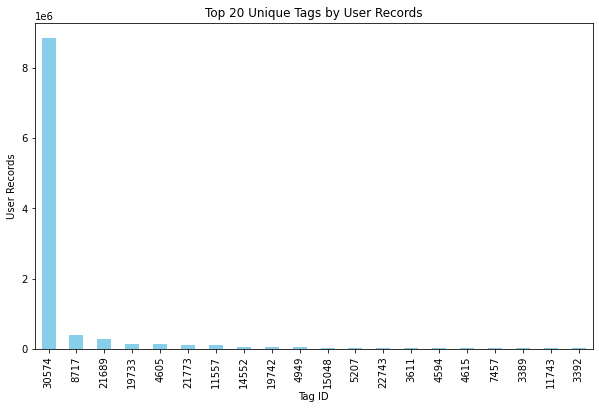

In [47]:
top_tags = tags_df.groupby('tag_id')['count'].sum().sort_values(ascending=False).head(20)
plt.figure(figsize=(10, 6))
top_tags.plot(kind='bar', color='skyblue')
plt.title('Top 20 Unique Tags by User Records')
plt.xlabel('Tag ID')
plt.ylabel('User Records')
plt.show()